In [58]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import ascii
from scipy.optimize import curve_fit

In [59]:
COData = ascii.read('C:/Users/seven/OneDrive/Documents/CO Data - Polaris/COpol119070p2800.txt')

In [60]:
vel = COData['col1']
Ta = COData['col2']

In [61]:
def Gauss(x, height, center, width):
    y = height*np.exp(-(x-center)**2/(2*width**2))
    return y

In [62]:
igood = np.where((vel >= -100) & (vel <=100))

In [63]:
vel = vel[igood]
Ta = Ta[igood]

In [64]:
parameters, covariance = curve_fit(Gauss, vel, Ta, p0=[0.03, 0, 4])
fitA = parameters[0]
fitB = parameters[1]
fitC = parameters[2]
fit_y = Gauss(vel, fitA, fitB, fitC)

5.110676637258199
5.03644572323349
1.0147387499248284


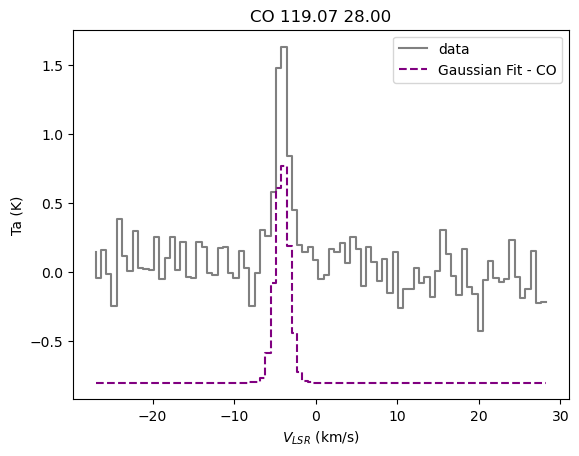

In [65]:
plt.step(vel, Ta, 'grey', label = 'data')
plt.step(vel, fit_y-0.8, 'purple',ls='dashed', label = 'Gaussian Fit - CO')
plt.legend()
#plt.xlim(-100, 100)
plt.legend(loc = 'best')
plt.xlabel(r'$V_{LSR}$ (km/s)')
plt.ylabel('Ta (K)')
plt.title('CO 119.07 28.00')
integral = np.sum(Ta[igood])*(vel[1]-vel[0])
err = np.sqrt(len(vel[igood])*np.std(Ta[igood]))
SigNoise = integral/err
print(integral)
print(err)
print(SigNoise)